In [2]:
import pandas as pd, seaborn as sns, numpy as np, random

In [3]:
bulk_pc_expression = pd.read_csv('../../data/bulk/bulk_pc.csv', index_col=0)
pc_genes = pd.read_csv("../../data/pc_genes/processed_uniprot.csv", index_col=0)
sum_pc_expression = pd.read_csv('../../data/pseudobulk/sum_pseudobulk_pc.csv', index_col=0)
GO_annotations = pd.read_csv('../../data/GO/pro_GO.csv')
wide = pd.read_csv('../../data/pseudobulk/sum_pseudobulk_pc_wide.csv', index_col=0)

In [4]:
def filter_for_pc_genes(expression, pc_genes):
    pc = pc_genes.loc[:,'FirstUniprot']
    df=expression.iloc[:, np.isin(expression.columns, pc)]
    return df

def sample_negative_genes(expression:pd.DataFrame, GO_term, num_sample:int, GO_annotations:pd.DataFrame):
    genes=np.array(expression.columns)
    GO_filtered_expression = get_genes_with_GO(GO_term, GO_annotations)

    negative_set=np.setxor1d(genes, GO_filtered_expression.columns)
    samples=random.sample(list(negative_set), num_sample)
    return get_negative_gene_expression(expression, samples)

def get_negative_gene_expression(expression, negative_genes):
    return expression[negative_genes]

def get_genes_with_GO(GO_term:str, GO_annotations):
    theGO=GO_annotations[GO_annotations.loc[:,"GO ID"]==GO_term]
    theGO=theGO.loc[:,("DB_Object_Symbol", "DB Object Name")].drop_duplicates()
    return theGO


# 1 Identify how correlated the Sum Cell Type Profiles are

In [5]:
sum_pc_expression_corr = sum_pc_expression.transpose().corr()

In [6]:
# Get Organism Parts indexed by OP-CT
OPs = wide.loc[:,'OrganismPart']

In [39]:
# create a palette with a unique color for each OP
palette = sns.hls_palette(len(set(OPs)))
palette = random.sample(palette, len(palette))

In [40]:
# Create a Dict Map between OP and color
mymap =dict(zip(OPs.unique(), palette))
mymap

{'Tongue': (0.86, 0.33999999999999997, 0.43879999999999986),
 'Muscle': (0.6311999999999998, 0.33999999999999997, 0.86),
 'Eye': (0.43879999999999986, 0.86, 0.33999999999999997),
 'Large': (0.3712, 0.33999999999999997, 0.86),
 'Pancreas': (0.7612000000000001, 0.33999999999999997, 0.86),
 'Prostate': (0.33999999999999997, 0.6988, 0.86),
 'Blood': (0.5011999999999995, 0.33999999999999997, 0.86),
 'Small': (0.86, 0.6312, 0.33999999999999997),
 'Vasculature': (0.33999999999999997, 0.86, 0.5012000000000001),
 'Lymph': (0.33999999999999997, 0.43879999999999986, 0.86),
 'Bone': (0.33999999999999997, 0.86, 0.3712),
 'Trachea': (0.33999999999999997, 0.86, 0.7612000000000001),
 'Skin': (0.6988, 0.86, 0.33999999999999997),
 'Uterus': (0.8287999999999999, 0.86, 0.33999999999999997),
 'Spleen': (0.86, 0.33999999999999997, 0.5688000000000001),
 'Heart': (0.86, 0.5012, 0.33999999999999997),
 'Salivary': (0.86, 0.3712, 0.33999999999999997),
 'Thymus': (0.33999999999999997, 0.8287999999999999, 0.86),
 

In [41]:
# Make anotation df
annotdf = OPs

In [42]:
# Using the annot df, and the OP-color map. map our samples to colors
cmap = annotdf.map(mymap)

In [43]:
import pandas as pd
import numpy as np

def lower_triangle(df):
    """
    Returns the lower triangle of a square Pandas DataFrame as a new DataFrame.
    """
    matrix = df.values  # get the underlying numpy array
    n = matrix.shape[0]  # get the size of the matrix
    indices = np.tril_indices(n, k=-1)  # get the indices of the lower triangle
    lower = np.empty_like(matrix)  # create a new matrix with the same shape as the input
    lower.fill(np.nan)  # fill the new matrix with NaNs
    lower[indices] = matrix[indices]  # copy the lower triangle elements to the new matrix
    return pd.DataFrame(lower, columns=df.columns, index=df.index)  # return the new DataFrame


/home/aadrian/anaconda3/envs/PseudoPipelineEnv/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


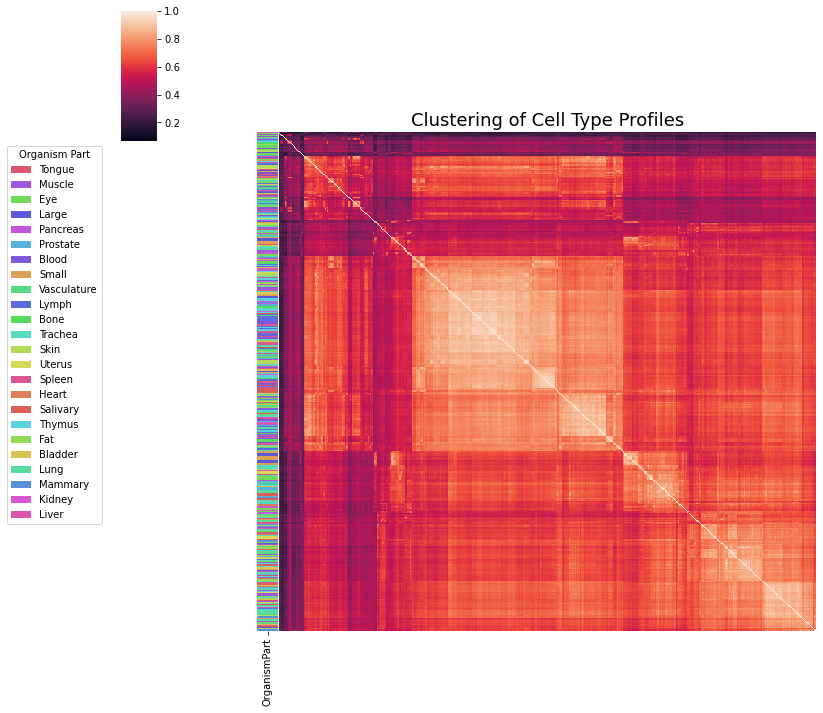

In [44]:
g=sns.clustermap(sum_pc_expression_corr,
                 xticklabels=False,
                yticklabels=False,
                  row_linkage=None,
                    col_linkage=None,
                      row_cluster=True, 
                      col_cluster=True,
                      row_colors=cmap)

g.ax_heatmap.set_title('Clustering of Cell Type Profiles', fontdict={'fontsize': 18})
g.ax_row_dendrogram.set_visible(False) #suppress row dendrogram
g.ax_col_dendrogram.set_visible(False)

from matplotlib.patches import Patch
import matplotlib.pyplot as plt

handles = [Patch(facecolor=mymap[key]) for key in mymap]
plt.legend(handles, mymap, title='Organism Part',
           bbox_to_anchor=(0, 0.8), bbox_transform=plt.gcf().transFigure, loc='upper right')

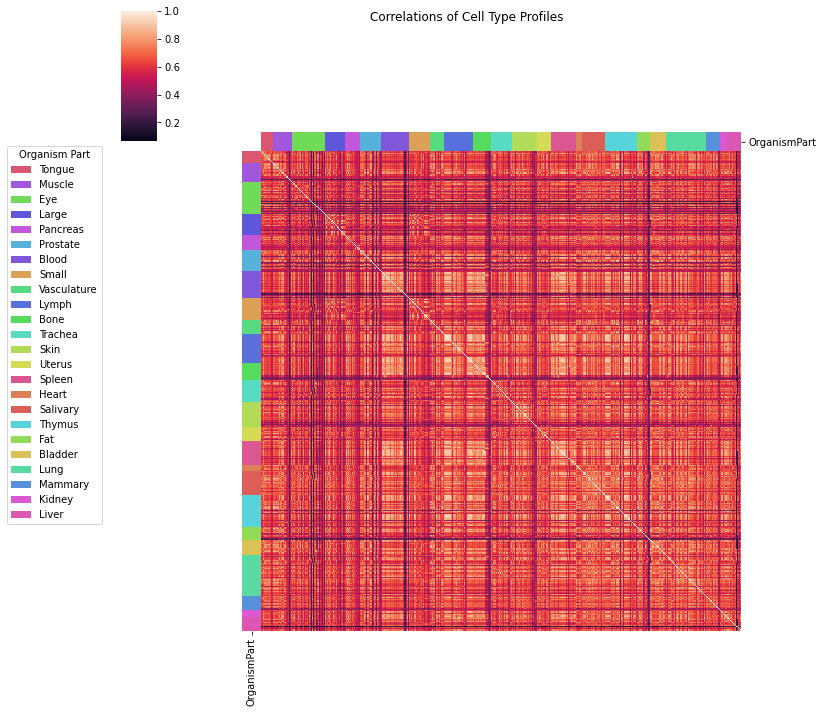

In [45]:
g=sns.clustermap(sum_pc_expression_corr,
                 xticklabels=False,
                yticklabels=False,
                  row_linkage=None,
                    col_linkage=None,
                      row_cluster=False, 
                      col_cluster=False,
                      row_colors=cmap,
                      col_colors=cmap)
g.fig.suptitle('Correlations of Cell Type Profiles') 
# title = g.ax_heatmap.set_title('Correlations of Cell Type Profiles', fontdict={'fontsize': 18})
# title.set_y(50)  # raise the title by 20 units
g.ax_row_dendrogram.set_visible(False) #suppress row dendrogram
g.ax_col_dendrogram.set_visible(False)

from matplotlib.patches import Patch
import matplotlib.pyplot as plt

handles = [Patch(facecolor=mymap[key]) for key in mymap]
plt.legend(handles, mymap, title='Organism Part',
           bbox_to_anchor=(0, 0.8), bbox_transform=plt.gcf().transFigure, loc='upper right')

In [48]:
blood = wide[wide.loc[:,'OrganismPart'] == 'Blood']
spleen = wide[wide.loc[:,'OrganismPart'] == 'Spleen']

In [51]:
np.intersect1d(blood.loc[:,'CellType'].unique(), blood.loc[:,'CellType'].unique())

array(['basophil', 'cd141-positive myeloid dendritic cell',
       'cd24 neutrophil', 'cd4-positive, alpha-beta memory t cell',
       'cd4-positive, alpha-beta t cell',
       'cd8-positive, alpha-beta cytokine secreting effector t cell',
       'cd8-positive, alpha-beta t cell', 'classical monocyte',
       'erythrocyte', 'granulocyte', 'hematopoietic stem cell',
       'macrophage', 'memory b cell', 'monocyte', 'myeloid progenitor',
       'naive b cell',
       'naive thymus-derived cd4-positive, alpha-beta t cell',
       'nampt neutrophil', 'neutrophil', 'nk cell',
       'non-classical monocyte', 'plasma cell', 'plasmablast',
       'plasmacytoid dendritic cell', 'platelet', 't cell',
       'type i nk t cell'], dtype=object)

In [ ]:
np.intersect1d

# 2 Identify how correlated the Bulk OPs are

In [13]:
import seaborn as sns
import pandas as pd
from typing import Dict

def map_samples_to_colors(inputSeries: pd.Series) -> pd.Series:
    """
    Maps samples in a wide-format DataFrame to colors based on the values in a specified column.
    :param inputSeries: Must be a series where index is sample Id, and vals are the input of your map.

    :return: Series with the same index as the input DataFrame, containing the colors mapped to each sample.
    """

    # create a palette with a unique color for each OP
    palette = sns.color_palette('hls', len(set(inputSeries)))
    
    # Create a Dict Map between OP and color
    mymap: Dict[str, tuple] = dict(zip(inputSeries.unique(), palette))
    
    
    # Using the annotation df and the OP-color map, map our samples to colors
    cmap = inputSeries.map(mymap)
    
    return cmap


In [14]:
bulk_pc_expression_corr = bulk_pc_expression.transpose().corr()

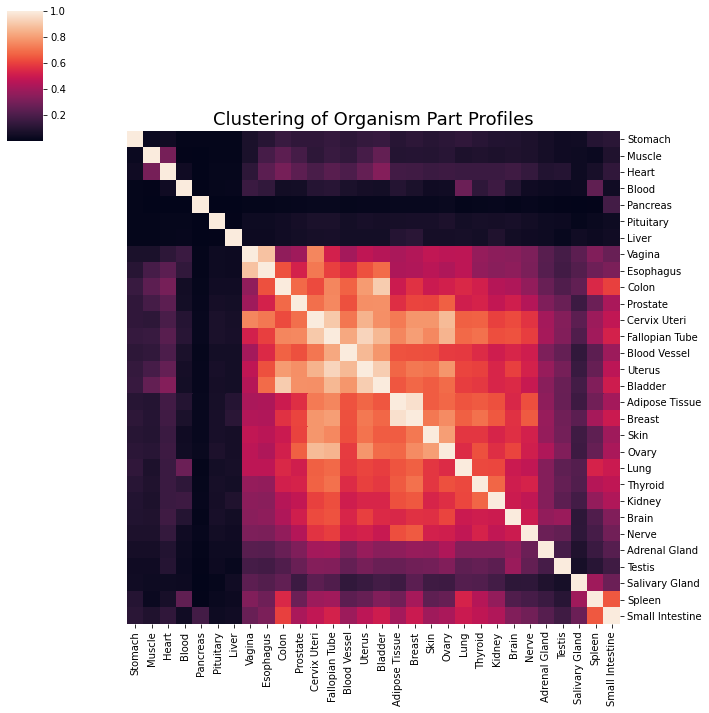

In [15]:
g=sns.clustermap(bulk_pc_expression_corr,
                xticklabels=True,  
                yticklabels=True,  
                row_linkage=None,   
                col_linkage=None,   
                row_cluster=True,   
                col_cluster=True)   
g.ax_heatmap.set_title('Clustering of Organism Part Profiles', fontdict={'fontsize': 18})
g.ax_row_dendrogram.set_visible(False) #suppress row dendrogram
g.ax_col_dendrogram.set_visible(False)




In [16]:
assert False

AssertionError: 

# I have no idea what the rest is for


In [ ]:
GO_term_genes = ['UBIAD1', 'COQ8A', 'COQ10B', 'COQ2', 'COQ3', 'PDSS2', 'COQ4', 'PDSS1',
       'COQ10A', 'COQ5', 'COQ6', 'COQ7', 'COQ9', 'FDXR', 'COQ8B']
seaborn.set(rc={'figure.figsize':(20, 5)})
seaborn.heatmap((bulk_pc_expression.iloc[:,np.isin(bulk_pc_expression.columns, GO_term_genes)]), xticklabels=True)

NameError: name 'seaborn' is not defined

In [ ]:
bulk_pc_expression.iloc[:,np.isin(bulk_pc_expression.columns, GO_term_genes)]

,UBIAD1,COQ8A,COQ10B,COQ2,COQ3,PDSS2,COQ4,PDSS1
Adipose Tissue,8.997255,51.748080,29.266060,5.694585,9.313582,8.805938,19.074140,4.275746
Muscle,9.333745,396.774870,8.721835,9.512952,17.171230,5.807078,8.520136,4.562126
Blood Vessel,10.078468,17.672136,37.531246,4.762271,10.349673,9.337108,15.447301,3.232536
Heart,3.805703,50.614470,13.666711,6.333447,17.612396,5.979074,11.265534,2.324720
Uterus,13.085710,33.755062,22.206127,9.108497,13.054491,10.638101,32.549160,5.820859
Vagina,8.338507,22.163900,20.899168,8.410816,12.811098,9.010929,32.819233,6.527660
Breast,9.379824,44.063377,25.583006,5.282281,10.205602,9.340448,26.952272,4.463042
Skin,11.008501,21.908194,20.127542,12.965217,12.132952,9.484674,38.188606,6.133542
Salivary Gland,7.770879,31.136028,17.219936,7.838299,11.722590,9.174358,31.925943,4.034013
Brain,4.469200,17.604189,14.622359,2.217005,14.180421,3.748371,21.511808,4.000313


For two genes to correlated/coexpressed in this graph would mean that their colors change vertically in the same relative ammount.

In [ ]:
bulk_pc_expression.iloc[:,np.isin(bulk_pc_expression.columns, ["MXRA8", "CCNL2"])].corr()

,MXRA8,CCNL2
MXRA8,1.000000,0.738743
CCNL2,0.738743,1.000000


In [ ]:
np.isin(bulk_pc_expression.columns, ["MXRA8", "CCNL2"])

array([False, False, False, ..., False, False, False])

# Sum Expression

In [ ]:
sum_pc

,auc,avg_node_degree,degree_null_auc
GO:0002250,0.841366,5197.049347,0.212785
GO:0045087,0.693489,7212.981509,0.407164
GO:0006955,0.756021,6225.279907,0.289580
GO:0050830,0.715531,5486.479680,0.266029
GO:0007015,0.565999,7879.969391,0.451371
...,...,...,...
GO:0017183,0.769644,10198.228759,0.706023
GO:0035721,0.861489,10103.980089,0.679662
GO:0036444,0.563880,9961.915790,0.745616
GO:0048856,0.723171,6579.503101,0.342404


In [ ]:
sum_pc_expression = filter_for_pc_genes(sum_expression, pc_genes=pc_genes)

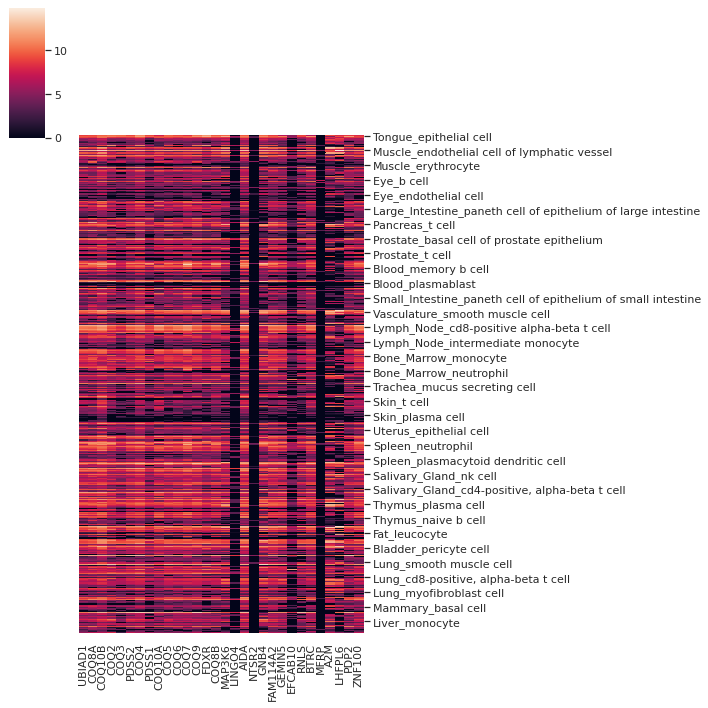

In [ ]:
GO_term_genes = ['UBIAD1', 'COQ8A', 'COQ10B', 'COQ2', 'COQ3', 'PDSS2', 'COQ4', 'PDSS1', 'COQ10A', 'COQ5', 'COQ6', 'COQ7', 'COQ9', 'FDXR', 'COQ8B']

negative_genes = list(sample_negative_genes(sum_pc_expression, "GO:000674", 15, GO_annotations).columns)

input_genes = GO_term_genes+negative_genes

#sorted_df = sum_pc_expression.iloc[:,np.isin(sum_pc_expression.columns, input_genes)].sort_values(input_genes)
sorted_df1 = sum_pc_expression.iloc[:,np.isin(sum_pc_expression.columns,GO_term_genes)]
sorted_df2 = sum_pc_expression.iloc[:,np.isin(sum_pc_expression.columns,negative_genes)]



seaborn.set(rc={'figure.figsize':(20, 5)})
seaborn.clustermap(sorted_df1.join(sorted_df2), xticklabels=True, col_cluster=False, row_cluster=False)

The first 15 are GO affiliated genes, the next 15 are not. 

/home/aadrian/anaconda3/envs/PseudoPipelineEnv/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


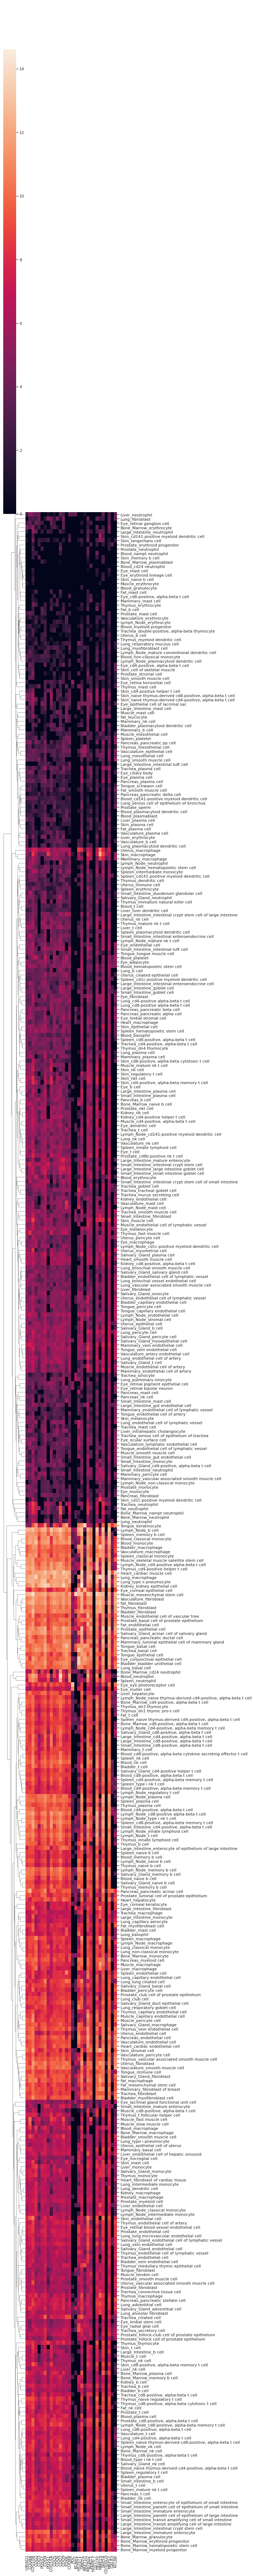

In [ ]:
GO_term_genes = ['UBIAD1', 'COQ8A', 'COQ10B', 'COQ2', 'COQ3', 'PDSS2', 'COQ4', 'PDSS1', 'COQ10A', 'COQ5', 'COQ6', 'COQ7', 'COQ9', 'FDXR', 'COQ8B']

negative_genes = list(sample_negative_genes(sum_pc_expression, "GO:000674", 15, GO_annotations).columns)

input_genes = GO_term_genes+negative_genes

#sorted_df = sum_pc_expression.iloc[:,np.isin(sum_pc_expression.columns, input_genes)].sort_values(input_genes)
sorted_df1 = sum_pc_expression.iloc[:,np.isin(sum_pc_expression.columns,GO_term_genes)]
sorted_df2 = sum_pc_expression.iloc[:,np.isin(sum_pc_expression.columns,negative_genes)]



seaborn.set(rc={'figure.figsize':(20, 10)})
seaborn.clustermap(sorted_df1.join(sorted_df2), xticklabels=True,  yticklabels=True, col_cluster=False, row_cluster=True, figsize=(10,100))

In [ ]:
sorted_df1.join(sorted_df2)

,UBIAD1,COQ8A,COQ10B,COQ2,COQ3,PDSS2,COQ4,PDSS1,COQ10A,COQ5,...,SLC26A3,SMC2,OR1K1,ASAH2,PHYHIPL,TAS2R43,TMBIM4,SERPINF1,CCL16,ZNF160
Tongue_epithelial cell,8.888690,9.096274,9.916150,10.350425,10.175212,9.130639,11.276875,9.190674,7.698034,9.946289,...,1.719826e-07,9.585536,1.719826e-07,4.016257e+00,6.674055,1.719826e-07,10.830004,9.394481,5.293131e+00,7.781780
Tongue_basal cell,9.688628,9.660656,10.555865,10.873633,10.526010,10.283404,11.990807,10.203886,9.425653,10.241983,...,1.635111e+00,12.446743,2.849678e+00,5.107697e+00,3.922344,0.000000e+00,10.946321,7.380063,0.000000e+00,9.994374
Tongue_immune cell,8.944144,8.531973,10.261235,8.526037,8.251226,8.471436,9.560466,7.250837,9.426630,8.982753,...,1.328090e+00,9.854129,1.719826e-07,4.144309e+00,0.968361,1.719826e-07,10.661860,9.569276,1.719826e-07,9.149480
Tongue_fibroblast,5.930764,5.766718,6.995479,5.293272,5.057635,6.098677,7.248459,3.089141,4.818451,6.871220,...,8.599130e-07,6.483333,8.599130e-07,8.599130e-07,2.239415,8.599130e-07,8.137148,9.050538,9.973912e-01,6.244178
Tongue_vein endothelial cell,5.094930,6.609625,7.447234,4.612443,5.034171,6.355900,6.689305,3.397739,5.393440,5.683406,...,2.900523e-01,6.753689,8.599130e-07,8.599130e-07,6.052722,8.599130e-07,7.904059,1.800388,6.985881e+00,7.275074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liver_t cell,5.420412,5.978919,5.638101,3.781941,0.000002,4.797869,5.811536,4.810175,5.483503,3.756844,...,1.719825e-06,5.568047,1.719825e-06,9.998403e-02,3.459432,1.719825e-06,6.424915,4.890007,5.357552e+00,5.479989
Liver_neutrophil,2.651206,5.219750,4.464265,3.775559,4.093764,0.000005,0.000005,1.028941,0.000005,1.014648,...,4.101951e+00,4.229576,4.643524e-06,5.098588e+00,3.045442,4.643524e-06,4.200225,2.284939,4.643524e-06,3.339176
Liver_plasma cell,3.970904,2.820330,3.575697,0.000009,0.000009,2.863515,4.279672,3.642761,3.397386,4.467230,...,9.115051e-06,3.185305,9.115051e-06,9.115051e-06,0.000009,9.115051e-06,5.148599,0.913648,4.392318e+00,2.021626
Liver_erythrocyte,4.345294,1.715627,4.514378,2.308437,0.000004,4.278201,4.747959,0.000004,3.438875,2.580625,...,4.127578e-06,6.501131,4.127578e-06,4.127578e-06,0.000004,4.127578e-06,3.646394,4.527797,4.127578e-06,3.383457


/home/aadrian/anaconda3/envs/PseudoPipelineEnv/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


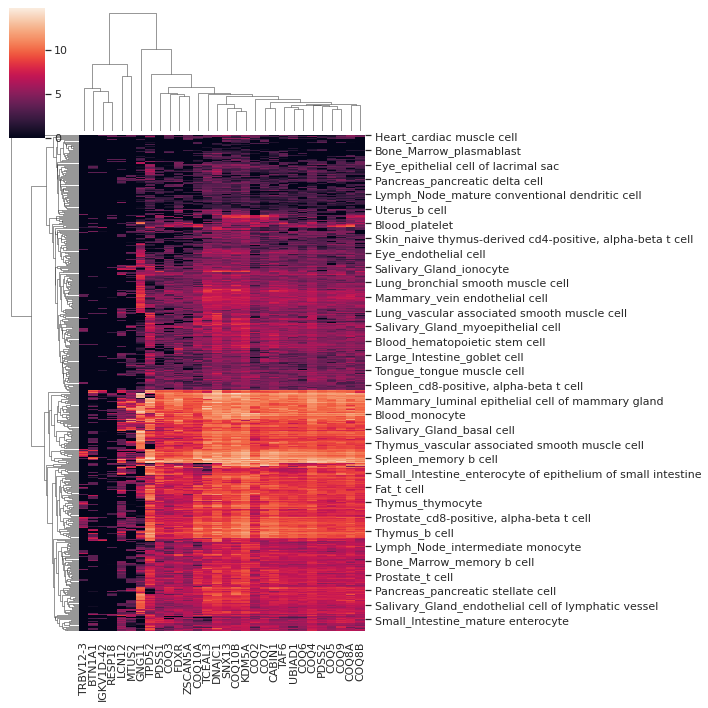

In [ ]:
GO_term_genes = ['UBIAD1', 'COQ8A', 'COQ10B', 'COQ2', 'COQ3', 'PDSS2', 'COQ4', 'PDSS1', 'COQ10A', 'COQ5', 'COQ6', 'COQ7', 'COQ9', 'FDXR', 'COQ8B']

negative_genes = list(sample_negative_genes(sum_pc_expression, "GO:000674", 15, GO_annotations).columns)

input_genes = GO_term_genes+negative_genes

sorted_df = sum_pc_expression.iloc[:,np.isin(sum_pc_expression.columns, input_genes)].sort_values(input_genes)
#sorted_df = sum_pc_expression.iloc[:,np.isin(sum_pc_expression.columns,GO_term_genes)]

seaborn.set(rc={'figure.figsize':(20, 5)})
seaborn.heatmap(sorted_df, xticklabels=True)

In [ ]:
input_genes

['UBIAD1',
 'COQ8A',
 'COQ10B',
 'COQ2',
 'COQ3',
 'PDSS2',
 'COQ4',
 'PDSS1',
 'COQ10A',
 'COQ5',
 'COQ6',
 'COQ7',
 'COQ9',
 'FDXR',
 'COQ8B',
 'RWDD2A',
 'CDK12',
 'COG8',
 'GPR149',
 'IL31',
 'OR10H5',
 'PEA15',
 'TNS2',
 'ENPEP',
 'KXD1',
 'PMF1',
 'GULP1',
 'ZNF70',
 'OR7A17',
 'CT45A10']

In [ ]:
sorted_df

,UBIAD1,PMF1,PEA15,COQ8A,GULP1,COQ10B,GPR149,COQ2,ENPEP,RWDD2A,...,COQ9,COG8,CDK12,FDXR,OR7A17,OR10H5,KXD1,COQ8B,ZNF70,CT45A10
Skin_cd1c-positive myeloid dendritic cell,0.000002,4.696099,7.906764,2.488822,0.000002,6.187074,0.000002,3.387299,0.054350,3.725789,...,3.696852,2.301187,6.318290,0.000002,0.364795,0.000002,5.456995,3.305230,0.091109,0.000002
Eye_epithelial cell of lacrimal sac,0.000005,3.517695,5.463645,4.187053,2.421587,5.541173,0.000005,2.077436,2.707365,0.000005,...,3.207370,0.000005,2.565390,4.381563,0.000005,0.000005,0.000005,4.001691,3.459432,0.000005
Mammary_b cell,0.000008,3.380642,2.814189,0.000008,0.000008,2.668158,0.000008,0.000008,2.859361,3.285277,...,2.803604,0.000008,3.057389,0.000008,0.000008,0.000008,3.977050,2.443361,0.000008,0.000008
Lymph_Node_non-classical monocyte,0.000009,3.791443,4.206111,3.121820,0.000009,4.406540,0.000009,4.728713,0.000009,0.000009,...,3.481328,3.072854,4.231461,0.000009,0.000009,0.000009,4.534597,0.000009,0.000009,0.000009
Prostate_stromal cell,0.000011,3.034442,3.338149,2.291244,3.312509,4.811424,0.000011,0.000011,0.000011,0.000011,...,3.172344,1.992687,2.108283,0.000011,4.392318,0.000011,2.807595,2.254539,0.000011,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lung_macrophage,11.637658,12.678829,11.969828,12.215602,3.191850,12.344630,4.392317,13.547995,2.104111,12.122552,...,11.971449,10.799984,12.574245,12.515884,5.829160,4.392317,13.073315,11.495195,9.816620,0.000000
Lung_type ii pneumocyte,11.850135,13.372435,11.501014,12.417432,12.113681,12.407058,0.000000,11.912945,7.534142,11.138757,...,12.312202,11.680822,12.317717,10.999387,8.169180,5.802039,12.825882,12.321401,9.911661,1.320332
Thymus_cd4-positive helper t cell,11.961398,11.175395,10.128097,11.706855,0.000000,12.249784,0.000000,10.573246,5.357594,10.381851,...,11.150376,11.470804,12.702926,9.878119,6.339850,0.000000,11.809878,10.829292,9.963225,0.000000
Muscle_mesenchymal stem cell,12.349360,12.591125,13.969601,12.750884,13.641640,14.069033,3.666972,11.487996,9.118390,11.209887,...,11.813722,11.608088,12.773317,10.270210,7.718353,6.265903,12.987793,12.027024,10.961116,0.000000


In [ ]:
sum_pc_expression.iloc[:,np.isin(sum_pc_expression.columns, input_genes)].sort_values(input_genes)

,UBIAD1,PMF1,PEA15,COQ8A,GULP1,COQ10B,GPR149,COQ2,ENPEP,RWDD2A,...,COQ9,COG8,CDK12,FDXR,OR7A17,OR10H5,KXD1,COQ8B,ZNF70,CT45A10
Skin_cd1c-positive myeloid dendritic cell,0.000002,4.696099,7.906764,2.488822,0.000002,6.187074,0.000002,3.387299,0.054350,3.725789,...,3.696852,2.301187,6.318290,0.000002,0.364795,0.000002,5.456995,3.305230,0.091109,0.000002
Eye_epithelial cell of lacrimal sac,0.000005,3.517695,5.463645,4.187053,2.421587,5.541173,0.000005,2.077436,2.707365,0.000005,...,3.207370,0.000005,2.565390,4.381563,0.000005,0.000005,0.000005,4.001691,3.459432,0.000005
Mammary_b cell,0.000008,3.380642,2.814189,0.000008,0.000008,2.668158,0.000008,0.000008,2.859361,3.285277,...,2.803604,0.000008,3.057389,0.000008,0.000008,0.000008,3.977050,2.443361,0.000008,0.000008
Lymph_Node_non-classical monocyte,0.000009,3.791443,4.206111,3.121820,0.000009,4.406540,0.000009,4.728713,0.000009,0.000009,...,3.481328,3.072854,4.231461,0.000009,0.000009,0.000009,4.534597,0.000009,0.000009,0.000009
Prostate_stromal cell,0.000011,3.034442,3.338149,2.291244,3.312509,4.811424,0.000011,0.000011,0.000011,0.000011,...,3.172344,1.992687,2.108283,0.000011,4.392318,0.000011,2.807595,2.254539,0.000011,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lung_macrophage,11.637658,12.678829,11.969828,12.215602,3.191850,12.344630,4.392317,13.547995,2.104111,12.122552,...,11.971449,10.799984,12.574245,12.515884,5.829160,4.392317,13.073315,11.495195,9.816620,0.000000
Lung_type ii pneumocyte,11.850135,13.372435,11.501014,12.417432,12.113681,12.407058,0.000000,11.912945,7.534142,11.138757,...,12.312202,11.680822,12.317717,10.999387,8.169180,5.802039,12.825882,12.321401,9.911661,1.320332
Thymus_cd4-positive helper t cell,11.961398,11.175395,10.128097,11.706855,0.000000,12.249784,0.000000,10.573246,5.357594,10.381851,...,11.150376,11.470804,12.702926,9.878119,6.339850,0.000000,11.809878,10.829292,9.963225,0.000000
Muscle_mesenchymal stem cell,12.349360,12.591125,13.969601,12.750884,13.641640,14.069033,3.666972,11.487996,9.118390,11.209887,...,11.813722,11.608088,12.773317,10.270210,7.718353,6.265903,12.987793,12.027024,10.961116,0.000000


In [ ]:
GO_term_genes.append(negative_genes)